In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data/full_data.csv")
df.head()

,time,tmin,tmax,prcp,snow,wspd,id
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9,1820
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7,1143
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7,1151
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7,1166
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3,1267


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [4]:
df.dtypes

time     object
tmin    float64
tmax    float64
prcp    float64
snow    float64
wspd    float64
id        int64
dtype: object

In [6]:
df['time']= pd.to_datetime(df['time']) 

In [7]:
# foam['a']= np.sin(np.pi/6*foam['time'].dt.month)
# foam['b']= np.cos(np.pi/6*foam['time'].dt.month)

In [8]:
X = df[["tmin", "tmax", "prcp", "snow", "wspd"]]
#X = foam[["Maximum Temperature", "Minimum Temperature","Temperature"]]
y = df["id"].values.reshape(-1, 1)
print(X.shape, y.shape)

(7401, 5) (7401, 1)


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [10]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.09495950675337483
Testing Score: 0.09896544623841197


Text(0.5, 1.0, 'Residual Plot')

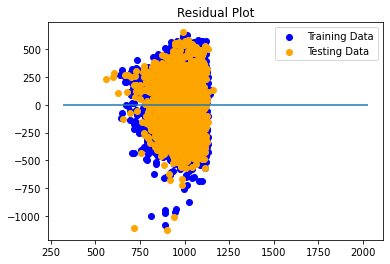

In [11]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

In [12]:
model.coef_
[["tmin", "tmax", "prcp", "snow", "wspd"]]

[['tmin', 'tmax', 'prcp', 'snow', 'wspd']]

In [13]:
model.intercept_

array([944.59470917])

In [14]:
from sklearn.ensemble import RandomForestRegressor

In [15]:
rf= RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

<ipython-input-15-8cf8f5eb92ef>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,y_train)


0.025118902565166357

In [16]:
from sklearn.ensemble import AdaBoostRegressor
reg= AdaBoostRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

/Users/justinlaka/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.08193511365082129

In [17]:
from sklearn.ensemble import GradientBoostingRegressor
reg= GradientBoostingRegressor()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

/Users/justinlaka/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.10006117075692555

In [18]:
from sklearn.linear_model import Ridge
reg= Ridge()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.09896542754784943

In [19]:
model.coef_
#[["tmin", "tmax", "prcp", "snow", "wspd"]]

array([[ 2.60984319,  3.91271476, -2.14320032, -0.40218323, -1.62690508]])

In [20]:
df

,time,tmin,tmax,prcp,snow,wspd,id
0,2001-01-01,-11.5,-3.5,0.0,411.5,11.9,1820
1,2001-01-02,-14.1,-6.3,0.0,381.0,13.7,1143
2,2001-01-03,-13.9,-2.2,0.0,375.7,19.7,1151
3,2001-01-04,-5.5,-0.2,0.0,356.0,18.7,1166
4,2001-01-05,-4.8,2.7,0.0,310.3,22.3,1267
...,...,...,...,...,...,...,...
7396,2021-04-02,-3.3,10.6,0.0,0.0,12.6,493
7397,2021-04-03,4.4,21.7,0.0,0.0,22.0,528
7398,2021-04-04,6.6,24.4,0.0,0.0,9.0,524
7399,2021-04-05,15.1,25.3,0.0,0.0,16.7,507
